<h1>Realisation de TP01</h1>

<h2>Algorithme de KNN</h2>

<h3>Real data</h3>

In [3]:
#Importation des packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split , KFold
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

from collections import Counter

<h3>Load data</h3>

In [4]:
#Importation de iris dataset
data_iris = datasets.load_iris()
#la concatination
iris_df = pd.DataFrame(data= np.c_[data_iris['data'], data_iris['target']],columns= data_iris['feature_names']+['target'])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


<h3>Data summary</h3>

In [5]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [6]:
#Diviser pour X et Y
x= iris_df.iloc[:, :-1]
y= iris_df.iloc[:, -1]

In [7]:
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: target, dtype: float64

In [9]:
#Diviser le benchmarck pour data training et data test
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, shuffle= True, # Mélanger les données pour éviter les biais
                                                                                                                            random_state= 0) 

In [10]:
x_train= np.asarray(x_train)
y_train= np.asarray(y_train)

x_test= np.asarray(x_test)
y_test= np.asarray(y_test)

In [11]:
print(f'training set size: {x_train.shape[0]} samples \ntest set size: {x_test.shape[0]} samples')

newIris = pd.DataFrame(np.column_stack([data_train,species_train]))

training set size: 120 samples 
test set size: 30 samples


<h3>Normalize the Dataset</h3>

In [12]:
#La normalization de dataset
scaler= Normalizer().fit(x_train) # the scaler is fitted to the training set
normalized_x_train= scaler.transform(x_train) # the scaler is applied to the training set
normalized_x_test= scaler.transform(x_test) # the scaler is applied to the test set

In [13]:
print('x train avant la normalization')
print(x_train[0:5])
print('\nx train apres la normalization')
print(normalized_x_train[0:5])
nbtrain = len(x_train)
print("la nombre de training data est :",nbtrain)
nbtest = len(x_test)
print("la nombre de testing data est :",nbtest)

x train avant la normalization
[[6.4 3.1 5.5 1.8]
 [5.4 3.  4.5 1.5]
 [5.2 3.5 1.5 0.2]
 [6.1 3.  4.9 1.8]
 [6.4 2.8 5.6 2.2]]

x train apres la normalization
[[0.69804799 0.338117   0.59988499 0.196326  ]
 [0.69333409 0.38518561 0.57777841 0.1925928 ]
 [0.80641965 0.54278246 0.23262105 0.03101614]
 [0.71171214 0.35002236 0.57170319 0.21001342]
 [0.69417747 0.30370264 0.60740528 0.2386235 ]]
la nombre de training data est : 120
la nombre de testing data est : 30


Text(0.5, 1.08, 'le Plot de dataset apres la normalization')

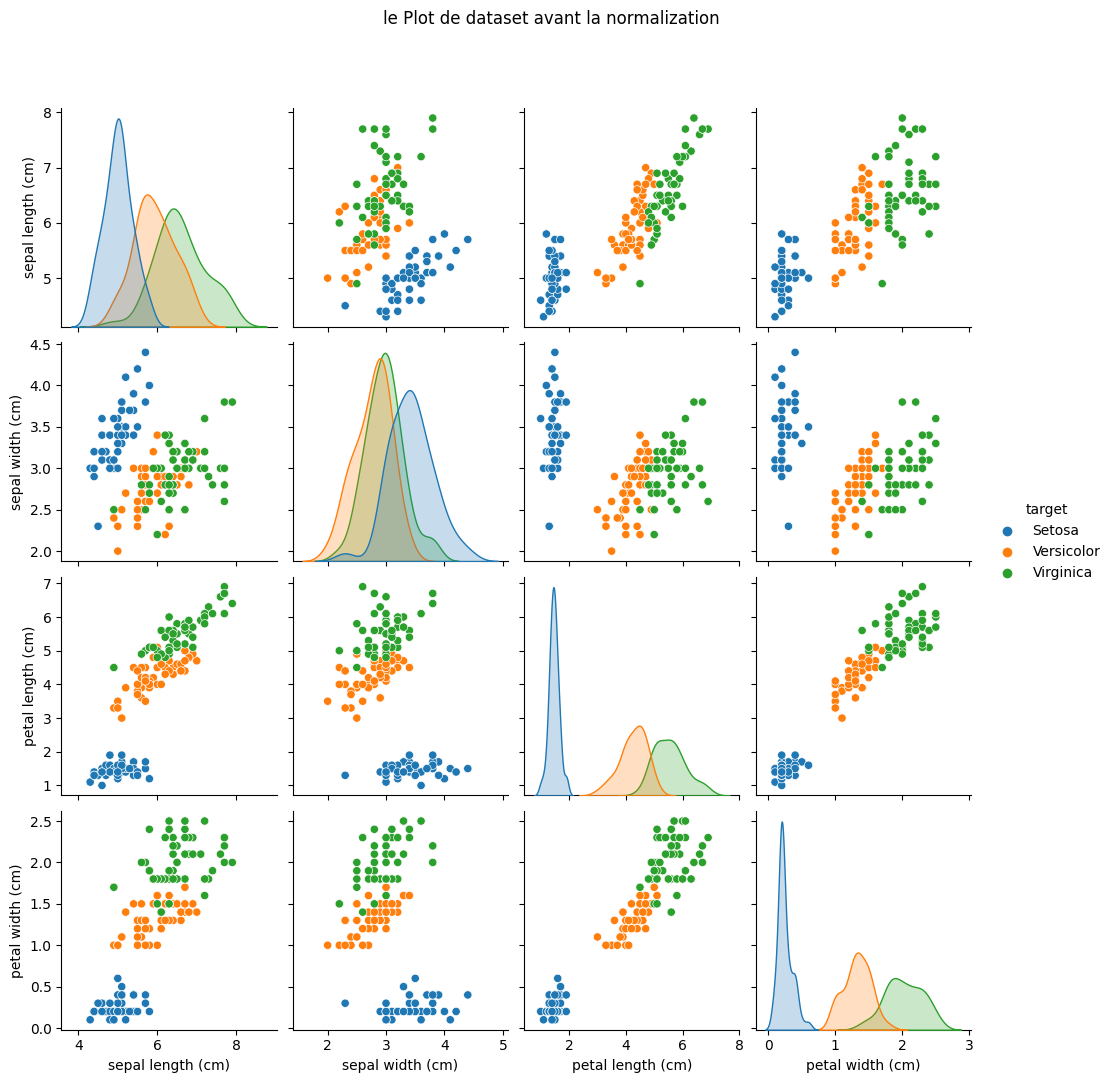

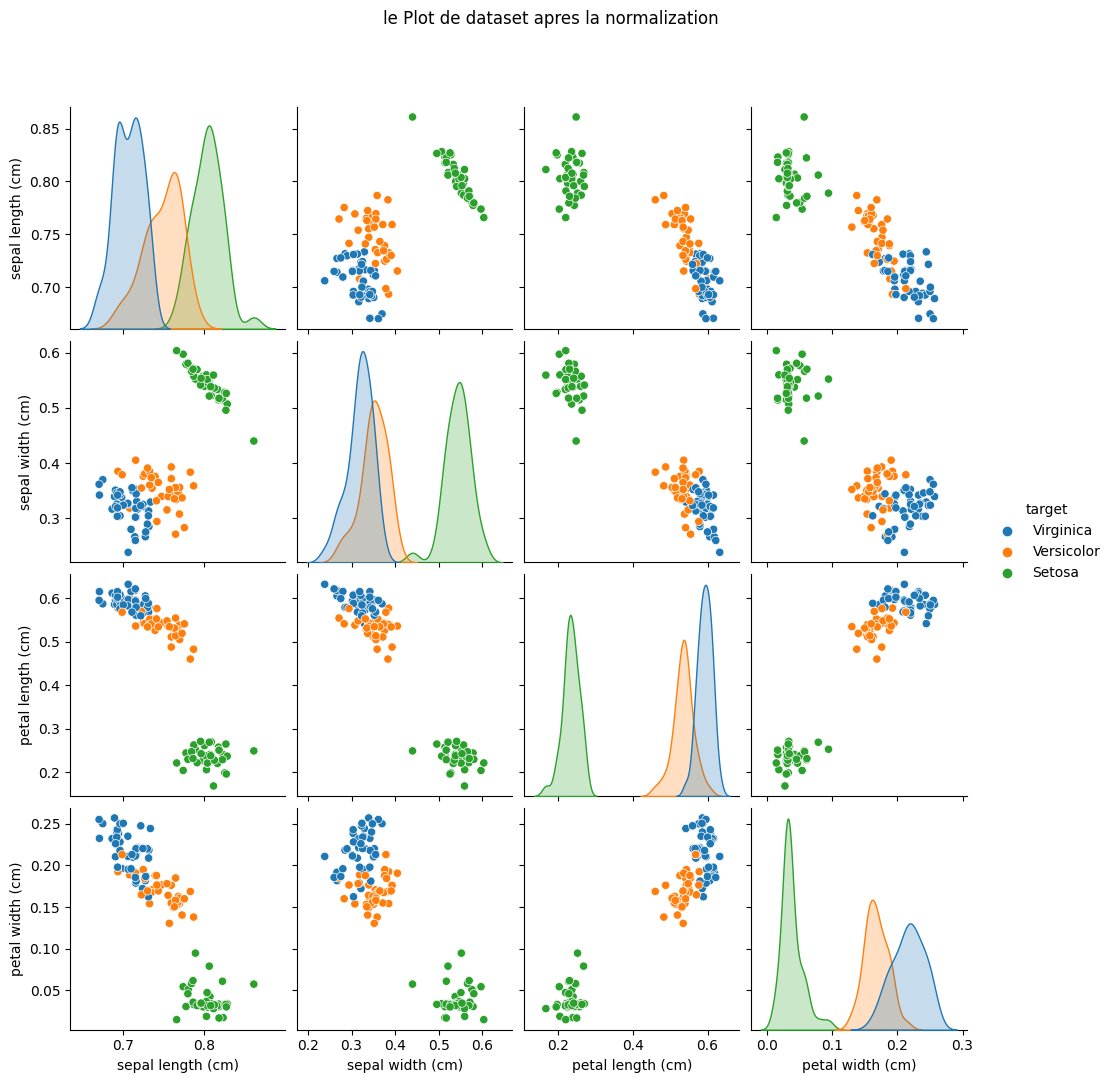

In [14]:
#Avant
di= {0.0: 'Setosa', 1.0: 'Versicolor', 2.0:'Virginica'}

before= sns.pairplot(iris_df.replace({'target': di}), hue= 'target')
before.fig.suptitle('le Plot de dataset avant la normalization', y=1.08)

#Apres
iris_df_2= pd.DataFrame(data= np.c_[normalized_x_train, y_train],
                        columns= data_iris['feature_names'] + ['target'])
di= {0.0: 'Setosa', 1.0: 'Versicolor', 2.0: 'Virginica'}
after= sns.pairplot(iris_df_2.replace({'target':di}), hue= 'target')
after.fig.suptitle('le Plot de dataset apres la normalization', y=1.08)

<h2>l'implementation de Naive Base</h2>

<h3>Etape 01 la distance eucliden</h3>

In [15]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [16]:
y_pred = classifier.predict(x_test) 
y_pred

array([2., 1., 0., 2., 0., 2., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 0., 0., 2., 1., 0., 0., 2., 0., 0., 1., 1., 0.])

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(y_test, y_pred))
cm

Accuracy :  0.9666666666666667


array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  1,  5]], dtype=int64)

In [ ]:
x =[]
likelihood = []
   
for j in range(len(newIris)):
    distribution = 1
    if(j<40):
        mean=setosa_mean
        std = setosa_std
    if(j>=40 and j<80):
        mean=versicolor_mean
        std = versicolor_std
    if(j>=80 and j<120):
        mean=virginica_mean
        std = virginica_std    
    
    for i in range(4):
        x = newIris.iloc[j] 
        a= ((x[i]- mean[i])**2)/(2*std[i]**2)
        b= math.sqrt(2*math.pi*(std[i]**2))
        y = math.exp(-a)/b
        distribution= distribution*y  
    likelihood.append(distribution)
    x=[]  
print(likelihood)

<h3>Etape 02 trouver les voisins les plus proches</h3>

<h3>Etape 03 Classer le point en fonction d'un vote majoritaire</h3>

<h3>Calculer la préscision de les du facon</h3>